In [1]:
# !conda activate PythonData
# !pip install yfinance as yf

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
import numpy as np
import yfinance as yf

In [3]:
combo_multi_path = "./combo_count_multiindex.csv"

ticker_path = "./final_ticker_list.csv"

In [4]:
count_df = pd.read_csv(combo_multi_path, header=[0,1], index_col=0)
ticker_list = pd.read_csv(ticker_path)

In [5]:
ticker_list = ticker_list["Tickers"].to_list()

In [6]:
count_df.head()

,AMC,PUBM,GOGO,ISUN,CLVS,GME,SKT,LGND,TRIT,ESPR,...,JP,AAPL,ET,MSM,FB,TLRY,BRO,CRSR,IBKR,BIO
,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,...,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions
date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,11.0,2.0,6.0,0.0,0.0,1801.0,0.0,0.0,0.0,0.0,...,2.0,88.0,4.0,0.0,11.0,1.0,77.0,44.0,5.0,1.0
2020-12-09,2.0,26.0,6.0,0.0,0.0,1867.0,0.0,0.0,0.0,0.0,...,61.0,212.0,8.0,0.0,161.0,3.0,151.0,91.0,11.0,6.0
2020-12-10,23.0,3.0,1.0,0.0,0.0,571.0,0.0,0.0,0.0,0.0,...,59.0,113.0,20.0,4.0,155.0,1.0,125.0,52.0,8.0,10.0
2020-12-11,15.0,3.0,0.0,0.0,0.0,406.0,1.0,0.0,0.0,0.0,...,19.0,112.0,6.0,9.0,52.0,0.0,177.0,100.0,18.0,5.0
2020-12-12,33.0,0.0,0.0,0.0,0.0,258.0,0.0,0.0,0.0,0.0,...,11.0,68.0,3.0,0.0,31.0,0.0,132.0,39.0,15.0,8.0


In [123]:
count_df=count_df.reset_index()

In [143]:
count_df['AMC']['mentions']

0        11.0
1         2.0
2        23.0
3        15.0
4        33.0
5        12.0
6        44.0
7        65.0
8        66.0
9        44.0
10       16.0
11       15.0
12        8.0
13       64.0
14       29.0
15       25.0
16        6.0
17       18.0
18       13.0
19       13.0
20       39.0
21       39.0
22       30.0
23       30.0
24        2.0
25        2.0
26        1.0
27        4.0
28        8.0
29        5.0
30        9.0
31        4.0
32        2.0
33        1.0
34        4.0
35        3.0
36        5.0
37       12.0
38       61.0
39        6.0
40        8.0
41       52.0
42       89.0
43       60.0
44       29.0
45      495.0
46       58.0
47       16.0
48      215.0
49       51.0
50    17025.0
51    24366.0
52    19266.0
53    15686.0
54    11754.0
55    19609.0
56    15521.0
57     1872.0
58       40.0
Name: mentions, dtype: float64

In [125]:
list(count_df)

[('date', ''),
 ('AMC', 'mentions'),
 ('PUBM', 'mentions'),
 ('GOGO', 'mentions'),
 ('ISUN', 'mentions'),
 ('CLVS', 'mentions'),
 ('GME', 'mentions'),
 ('SKT', 'mentions'),
 ('LGND', 'mentions'),
 ('TRIT', 'mentions'),
 ('ESPR', 'mentions'),
 ('KOSS', 'mentions'),
 ('GSX', 'mentions'),
 ('FIZZ', 'mentions'),
 ('ROOT', 'mentions'),
 ('AXDX', 'mentions'),
 ('ASO', 'mentions'),
 ('SENS', 'mentions'),
 ('AMCX', 'mentions'),
 ('SPWR', 'mentions'),
 ('OTRK', 'mentions'),
 ('ZYXI', 'mentions'),
 ('LAZR', 'mentions'),
 ('RKT', 'mentions'),
 ('TR', 'mentions'),
 ('MCS', 'mentions'),
 ('NNDM', 'mentions'),
 ('HUYA', 'mentions'),
 ('FLGT', 'mentions'),
 ('DISCA', 'mentions'),
 ('GDRX', 'mentions'),
 ('SRG', 'mentions'),
 ('BBBY', 'mentions'),
 ('VXRT', 'mentions'),
 ('REV', 'mentions'),
 ('MDGL', 'mentions'),
 ('ESGC', 'mentions'),
 ('RVP', 'mentions'),
 ('PGEN', 'mentions'),
 ('PETS', 'mentions'),
 ('ITP', 'mentions'),
 ('FUTU', 'mentions'),
 ('CLR', 'mentions'),
 ('NKLA', 'mentions'),
 ('TRHC',

In [118]:
list(count_df)

[('AMC', 'mentions'),
 ('PUBM', 'mentions'),
 ('GOGO', 'mentions'),
 ('ISUN', 'mentions'),
 ('CLVS', 'mentions'),
 ('GME', 'mentions'),
 ('SKT', 'mentions'),
 ('LGND', 'mentions'),
 ('TRIT', 'mentions'),
 ('ESPR', 'mentions'),
 ('KOSS', 'mentions'),
 ('GSX', 'mentions'),
 ('FIZZ', 'mentions'),
 ('ROOT', 'mentions'),
 ('AXDX', 'mentions'),
 ('ASO', 'mentions'),
 ('SENS', 'mentions'),
 ('AMCX', 'mentions'),
 ('SPWR', 'mentions'),
 ('OTRK', 'mentions'),
 ('ZYXI', 'mentions'),
 ('LAZR', 'mentions'),
 ('RKT', 'mentions'),
 ('TR', 'mentions'),
 ('MCS', 'mentions'),
 ('NNDM', 'mentions'),
 ('HUYA', 'mentions'),
 ('FLGT', 'mentions'),
 ('DISCA', 'mentions'),
 ('GDRX', 'mentions'),
 ('SRG', 'mentions'),
 ('BBBY', 'mentions'),
 ('VXRT', 'mentions'),
 ('REV', 'mentions'),
 ('MDGL', 'mentions'),
 ('ESGC', 'mentions'),
 ('RVP', 'mentions'),
 ('PGEN', 'mentions'),
 ('PETS', 'mentions'),
 ('ITP', 'mentions'),
 ('FUTU', 'mentions'),
 ('CLR', 'mentions'),
 ('NKLA', 'mentions'),
 ('TRHC', 'mentions'),
 

In [146]:

stockdf = pd.DataFrame(columns=['mentions'])
for stock in count_df:
    if stock[0] == 'date':
        continue
    print(pd.DataFrame(count_df[stock[0]]['mentions']))
    stockdf.append(pd.DataFrame(count_df[stock[0]]['mentions']))
stockdf

    mentions
0       11.0
1        2.0
2       23.0
3       15.0
4       33.0
5       12.0
6       44.0
7       65.0
8       66.0
9       44.0
10      16.0
11      15.0
12       8.0
13      64.0
14      29.0
15      25.0
16       6.0
17      18.0
18      13.0
19      13.0
20      39.0
21      39.0
22      30.0
23      30.0
24       2.0
25       2.0
26       1.0
27       4.0
28       8.0
29       5.0
30       9.0
31       4.0
32       2.0
33       1.0
34       4.0
35       3.0
36       5.0
37      12.0
38      61.0
39       6.0
40       8.0
41      52.0
42      89.0
43      60.0
44      29.0
45     495.0
46      58.0
47      16.0
48     215.0
49      51.0
50   17025.0
51   24366.0
52   19266.0
53   15686.0
54   11754.0
55   19609.0
56   15521.0
57    1872.0
58      40.0
    mentions
0        2.0
1       26.0
2        3.0
3        3.0
4        0.0
5        0.0
6        0.0
7        0.0
8        1.0
9        2.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       1.0

    mentions
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       0.0
50       1.0
51       0.0
52       0.0
53       0.0
54       0.0
55       1.0
56       0.0
57       0.0
58       0.0
    mentions
0      419.0
1      196.0
2       63.0
3      111.0
4       30.0
5       27.0
6       75.0
7      197.0
8       97.0
9       31.0
10      29.0
11      17.0
12      24.0
13      99.0
14      71.0
15      40.0

    mentions
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       1.0
49       0.0
50       1.0
51       1.0
52       0.0
53       0.0
54       0.0
55       0.0
56       0.0
57       0.0
58       0.0
    mentions
0        4.0
1        1.0
2        0.0
3        0.0
4        0.0
5        0.0
6        2.0
7        0.0
8        2.0
9        0.0
10       7.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0

    mentions
0       14.0
1       12.0
2       22.0
3        7.0
4        8.0
5        5.0
6        4.0
7       10.0
8        1.0
9        8.0
10       2.0
11       2.0
12       4.0
13       2.0
14       2.0
15       8.0
16       1.0
17       6.0
18       5.0
19       4.0
20       6.0
21       1.0
22       9.0
23       4.0
24       0.0
25       2.0
26       8.0
27      15.0
28       6.0
29      17.0
30       5.0
31       1.0
32       0.0
33       7.0
34       9.0
35       5.0
36       7.0
37      33.0
38      56.0
39      34.0
40      24.0
41      20.0
42      83.0
43     211.0
44     220.0
45     183.0
46     138.0
47      96.0
48     184.0
49     208.0
50   13869.0
51   11041.0
52    6340.0
53    3658.0
54    2386.0
55    3284.0
56    1896.0
57     268.0
58       7.0
    mentions
0      218.0
1      467.0
2      354.0
3      393.0
4      273.0
5      187.0
6      368.0
7      348.0
8      381.0
9      344.0
10     354.0
11     240.0
12     276.0
13     382.0
14     362.0
15     391.0

    mentions
0        1.0
1       12.0
2        4.0
3        4.0
4        5.0
5        2.0
6       13.0
7       13.0
8        9.0
9        9.0
10      12.0
11       8.0
12       5.0
13       5.0
14       7.0
15      11.0
16       7.0
17       8.0
18       3.0
19      13.0
20       7.0
21      11.0
22       4.0
23       7.0
24       7.0
25       6.0
26       3.0
27       6.0
28      12.0
29       4.0
30       6.0
31       8.0
32       4.0
33       5.0
34       7.0
35      10.0
36       5.0
37      10.0
38      17.0
39       2.0
40       9.0
41      15.0
42      26.0
43       9.0
44       8.0
45      28.0
46      22.0
47       7.0
48       4.0
49       5.0
50     192.0
51     460.0
52     324.0
53     326.0
54     257.0
55     169.0
56     166.0
57      21.0
58       1.0
    mentions
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0

    mentions
0        0.0
1        0.0
2        4.0
3        9.0
4        0.0
5        2.0
6        0.0
7        0.0
8        3.0
9        0.0
10       2.0
11       0.0
12       4.0
13       2.0
14       1.0
15       2.0
16       1.0
17       5.0
18       0.0
19       2.0
20       2.0
21       4.0
22       3.0
23       0.0
24       0.0
25       4.0
26       0.0
27       5.0
28       1.0
29       2.0
30       1.0
31       0.0
32       4.0
33       3.0
34       1.0
35       0.0
36       3.0
37       0.0
38       2.0
39       0.0
40       2.0
41       1.0
42       3.0
43       4.0
44       4.0
45       8.0
46       9.0
47       1.0
48       0.0
49       1.0
50      64.0
51     173.0
52     112.0
53      87.0
54     127.0
55     258.0
56     123.0
57      12.0
58       0.0
    mentions
0       11.0
1      161.0
2      155.0
3       52.0
4       31.0
5       16.0
6       42.0
7       51.0
8       49.0
9       71.0
10      42.0
11      24.0
12      19.0
13      39.0
14      85.0
15      54.0

,mentions


In [7]:
df = pd.DataFrame(yf.download(ticker_list, start="2020-12-08", end="2021-02-05", interval="1d", group_by='tickers', index=False))

[*********************100%***********************]  82 of 82 completed


In [8]:
amc_count = pd.DataFrame(count_df["AMC"])

In [9]:
amc_price = df["AMC"]

In [10]:
# enter combined AMC df info
amc_result = amc_count.join(amc_price)
amc_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,11.0,3.61,4.020000,3.61,3.98,3.98,2.953060e+07
2020-12-09,2.0,4.22,4.330000,3.75,3.86,3.86,2.099120e+07
2020-12-10,23.0,3.79,4.100000,3.77,4.09,4.09,1.987280e+07
2020-12-11,15.0,4.04,4.250000,3.87,3.92,3.92,2.231040e+07
2020-12-12,33.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,44.0,4.01,4.010000,3.00,3.19,3.19,6.715900e+07
2020-12-15,65.0,3.24,3.240000,2.76,2.86,2.86,5.443210e+07
2020-12-16,66.0,2.87,2.890000,2.72,2.78,2.78,2.542320e+07


In [11]:
amc_result.dropna(inplace=True)
amc_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,11.0,3.61,4.020000,3.61,3.98,3.98,2.953060e+07
2020-12-09,2.0,4.22,4.330000,3.75,3.86,3.86,2.099120e+07
2020-12-10,23.0,3.79,4.100000,3.77,4.09,4.09,1.987280e+07
2020-12-11,15.0,4.04,4.250000,3.87,3.92,3.92,2.231040e+07
2020-12-14,44.0,4.01,4.010000,3.00,3.19,3.19,6.715900e+07
2020-12-15,65.0,3.24,3.240000,2.76,2.86,2.86,5.443210e+07
2020-12-16,66.0,2.87,2.890000,2.72,2.78,2.78,2.542320e+07
2020-12-17,44.0,2.80,2.950000,2.74,2.85,2.85,2.379930e+07
2020-12-18,16.0,2.85,2.850000,2.76,2.80,2.80,2.194170e+07


In [12]:
# amc_result['datetime']=amc_result.index.to_pydatetime()
# amc_result["Year"]=amc_result['datetime'].dt.year
# amc_result["Month"]=amc_result['datetime'].dt.month
# amc_result["Day"]=amc_result['datetime'].dt.day
# # amc_result['date2']=amc_result.index
# amc_result.head()

In [13]:
# #interpolated the NaN columns
# df_interpol = amc_result.resample('D')\
#                 .mean()
# df_interpol['Close'] = df_interpol['Close'].interpolate()
# df_interpol['Open'] = df_interpol['Open'].interpolate()
# df_interpol['High'] = df_interpol['High'].interpolate()
# df_interpol['Low'] = df_interpol['Low'].interpolate()
# df_interpol['Adj Close'] = df_interpol['Adj Close'].interpolate()
# df_interpol['datetime']=df_interpol.index.to_pydatetime()
# # df_interpol['Volume'] = df_interpol['Volume'].interpolate()
# df_interpol.head(10)

In [14]:
# plt.figure(figsize=(16,8))
# plt.title('AMC Stocks Mention History Dec-Jan 2020-2021')
# plt.plot(amc_result['datetime'],amc_result['mentions'])
# plt.xlabel('datetime',fontsize=18)
# plt.ylabel('Mentions',fontsize=18)
# plt.style.use('fivethirtyeight')
# plt.show()

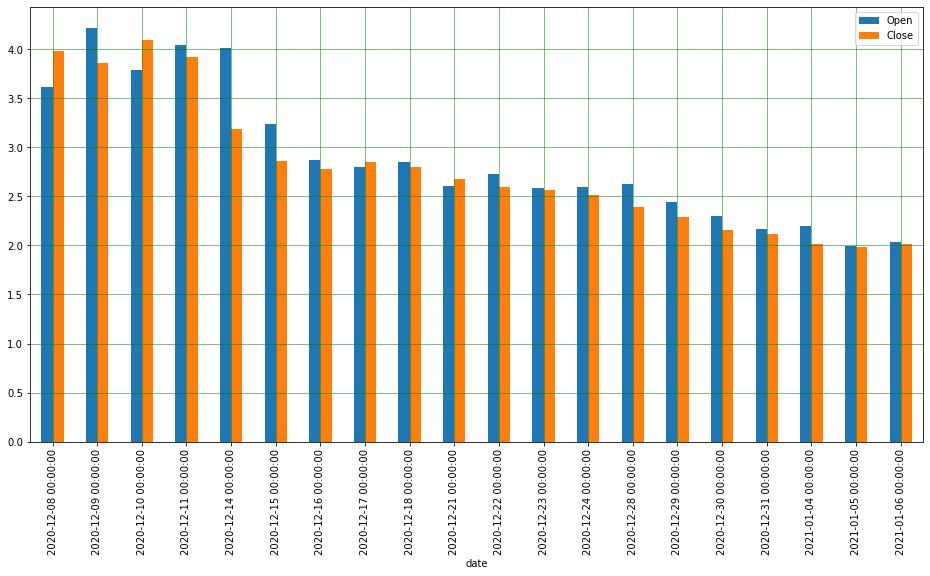

In [15]:
df_interpol = amc_result
#Plot Open vs Close
df_interpol[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

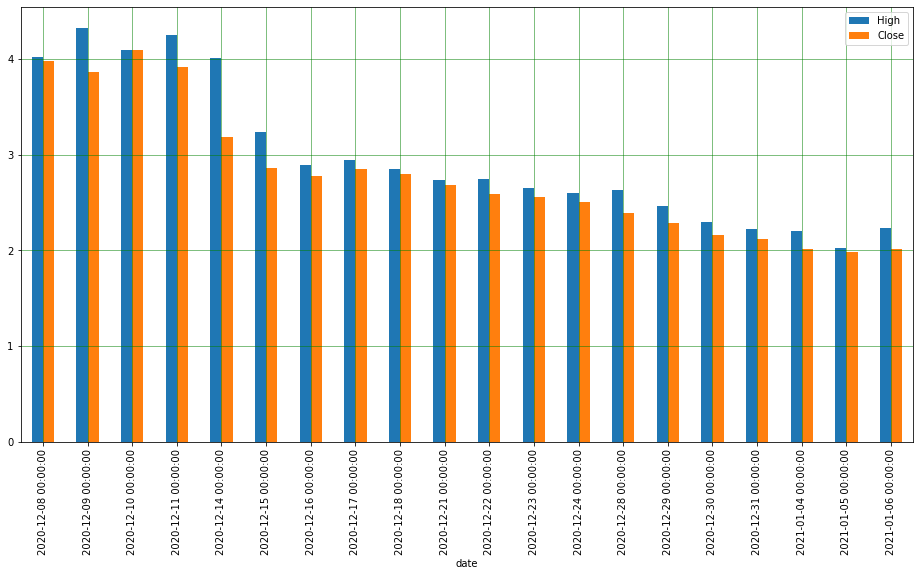

In [16]:
#Plot High vs Close
df_interpol[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

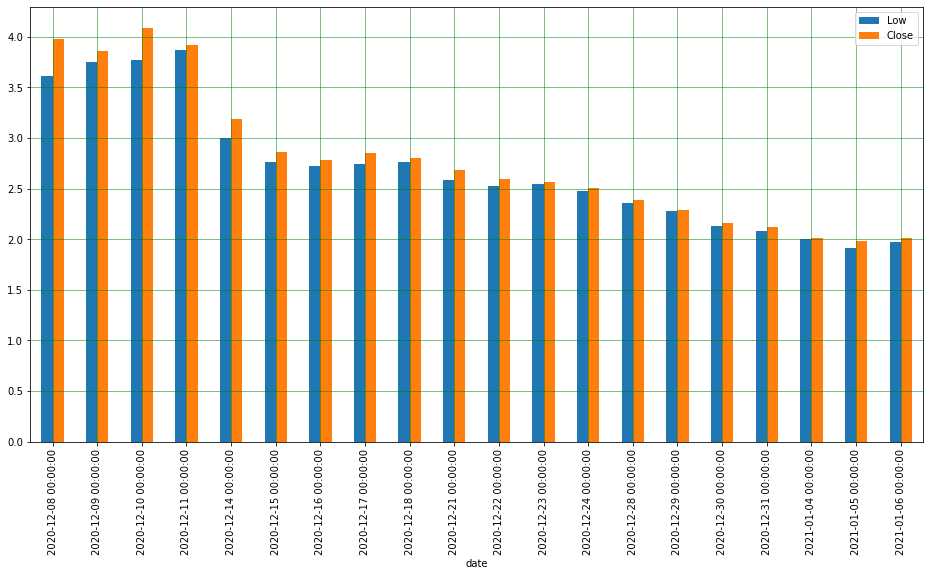

In [17]:
#Plot Low vs Close
df_interpol[["Low", "Close"]].head(20).plot(kind="bar", figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [18]:
# df_interpol["Year"]=df_interpol["datetime"].dt.year
# df_interpol["Month"]=df_interpol["datetime"].dt.month
# df_interpol["Day"]=df_interpol["datetime"].dt.day

In [19]:
# df_interpol=df_interpol[["Day","Month","Year","High","Open","Low","Close"]]
# df_interpol.head(10)

In [20]:
#  separate Independent and dependent variable
# X = amc_result.iloc[:,amc_result.columns !="Close"]
X = amc_result["mentions"]
# variable being predicted "Close" col 5
Y = amc_result["Close"]

In [109]:
X

date
2020-12-08     0.0
2020-12-09     0.0
2020-12-10     0.0
2020-12-11     0.0
2020-12-14     0.0
2020-12-15     0.0
2020-12-16     0.0
2020-12-17     0.0
2020-12-18     0.0
2020-12-21     0.0
2020-12-22     0.0
2020-12-23     0.0
2020-12-24     0.0
2020-12-28     0.0
2020-12-29     0.0
2020-12-30     0.0
2020-12-31     0.0
2021-01-04     0.0
2021-01-05     0.0
2021-01-06     0.0
2021-01-07     0.0
2021-01-08     0.0
2021-01-11     0.0
2021-01-12     0.0
2021-01-13     0.0
2021-01-14     0.0
2021-01-15     0.0
2021-01-19     0.0
2021-01-20     0.0
2021-01-21     1.0
2021-01-22     0.0
2021-01-25     3.0
2021-01-26     4.0
2021-01-27    12.0
2021-01-28     3.0
2021-01-29     8.0
2021-02-01     9.0
2021-02-02     2.0
2021-02-03     0.0
2021-02-04     0.0
Name: mentions, dtype: float64

In [21]:
# amc_result

In [22]:
print(X.shape) 
print(Y.shape) 

(40,)
(40,)


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [24]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(30,)
(10,)
(30,)
(10,)


In [25]:
#reshape

lr_model=LinearRegression()
lr_model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [26]:
# y_pred=lr_model.predict(x_test)
y_pred = lr_model.predict(y_test.values.reshape(-1, 1))
print(y_pred.shape)

(10,)


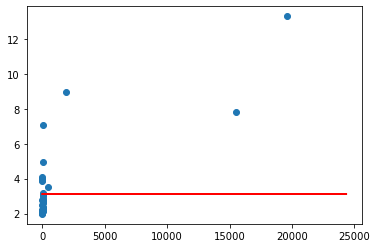

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [28]:
lr_model.score(x_test.values.reshape(-1, 1),y_test,sample_weight=None)

0.637753967500407

In [29]:
pubm_count = pd.DataFrame(count_df["PUBM"])

In [30]:
pubm_price = df["PUBM"]

In [31]:
# enter combined PUBM df info
pubm_result = pubm_count.join(pubm_price)
pubm_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-09,26.0,25.120001,33.160000,25.120001,29.450001,29.450001,8608200.0
2020-12-10,3.0,27.450001,29.200001,26.680000,27.350000,27.350000,1170500.0
2020-12-11,3.0,27.500000,28.139999,24.660999,25.049999,25.049999,1110300.0
2020-12-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,0.0,25.580000,25.950001,24.100000,24.889999,24.889999,722500.0
2020-12-15,0.0,24.990000,24.990000,22.420000,23.250000,23.250000,875300.0
2020-12-16,1.0,23.000000,27.170000,22.787001,26.860001,26.860001,1096800.0


In [32]:
pubm_result.dropna(inplace=True)
pubm_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-09,26.0,25.120001,33.160000,25.120001,29.450001,29.450001,8608200.0
2020-12-10,3.0,27.450001,29.200001,26.680000,27.350000,27.350000,1170500.0
2020-12-11,3.0,27.500000,28.139999,24.660999,25.049999,25.049999,1110300.0
2020-12-14,0.0,25.580000,25.950001,24.100000,24.889999,24.889999,722500.0
2020-12-15,0.0,24.990000,24.990000,22.420000,23.250000,23.250000,875300.0
2020-12-16,1.0,23.000000,27.170000,22.787001,26.860001,26.860001,1096800.0
2020-12-17,2.0,26.700001,28.000000,26.549999,27.620001,27.620001,497100.0
2020-12-18,0.0,27.600000,27.809999,25.100000,25.430000,25.430000,488600.0
2020-12-21,0.0,25.150000,25.201000,23.730000,24.500000,24.500000,756700.0


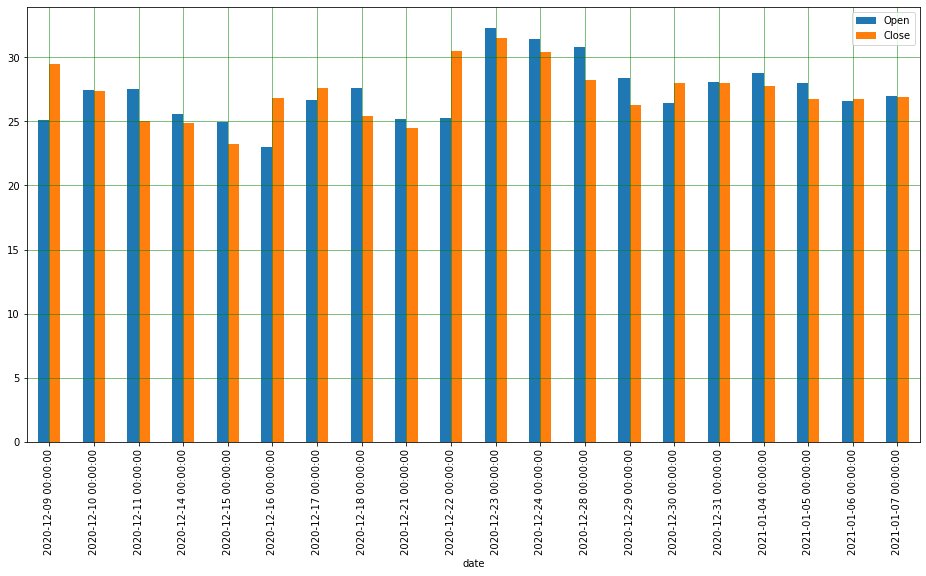

In [33]:
df_interpol = pubm_result
#Plot Open vs Close
df_interpol[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

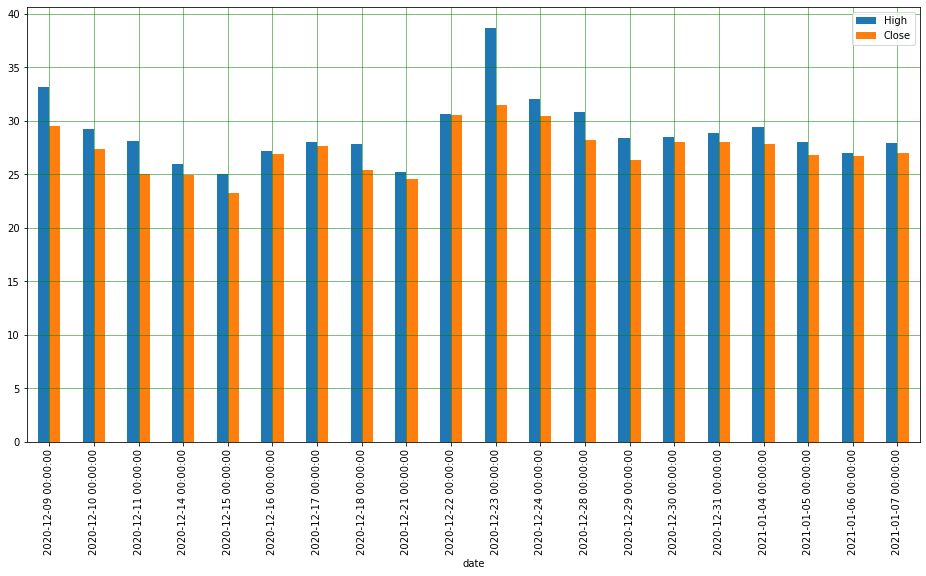

In [34]:
#Plot High vs Close
df_interpol[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

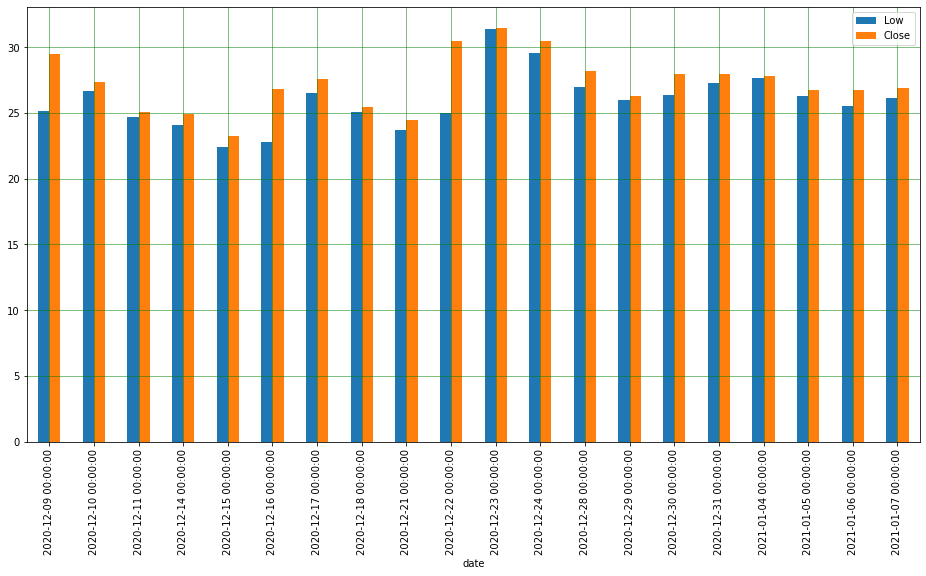

In [35]:
#Plot Low vs Close
df_interpol[["Low", "Close"]].head(20).plot(kind="bar", figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [36]:
#  separate Independent and dependent variable
# X = pubm_result.iloc[:,pubm_result.columns !="Close"]
X = pubm_result["mentions"]
# variable being predicted "Close" col 5
Y = pubm_result["Close"]

In [37]:
print(X.shape) 
print(Y.shape) 

(39,)
(39,)


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.15)

In [39]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(33,)
(6,)
(33,)
(6,)


In [40]:
#reshape

lr_model=LinearRegression()
lr_model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [41]:
# y_pred=lr_model.predict(x_test)
y_pred = lr_model.predict(y_test.values.reshape(-1, 1))
print(y_pred.shape)

(6,)


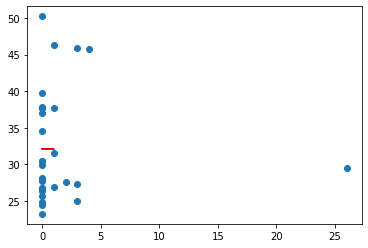

In [42]:
plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [43]:
lr_model.score(x_test.values.reshape(-1, 1),y_test,sample_weight=None)

-0.355743733247476

In [44]:
gogo_count = pd.DataFrame(count_df["GOGO"])

In [45]:
gogo_price = df["GOGO"]

In [46]:
# enter combined PUBM df info
gogo_result = gogo_count.join(gogo_price)
gogo_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,6.0,10.682,12.880,10.420,12.200,12.200,13371200.0
2020-12-09,6.0,12.250,12.390,11.040,11.240,11.240,4676300.0
2020-12-10,1.0,11.080,11.452,10.265,10.360,10.360,4742700.0
2020-12-11,0.0,10.323,10.740,9.760,10.120,10.120,3556300.0
2020-12-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,0.0,10.340,10.340,9.490,9.490,9.490,2768900.0
2020-12-15,0.0,9.580,10.145,9.400,9.970,9.970,2191600.0
2020-12-16,0.0,9.920,10.000,9.280,9.650,9.650,2589500.0


In [47]:
gogo_result.dropna(inplace=True)
gogo_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,6.0,10.682,12.880,10.420,12.200,12.200,13371200.0
2020-12-09,6.0,12.250,12.390,11.040,11.240,11.240,4676300.0
2020-12-10,1.0,11.080,11.452,10.265,10.360,10.360,4742700.0
2020-12-11,0.0,10.323,10.740,9.760,10.120,10.120,3556300.0
2020-12-14,0.0,10.340,10.340,9.490,9.490,9.490,2768900.0
2020-12-15,0.0,9.580,10.145,9.400,9.970,9.970,2191600.0
2020-12-16,0.0,9.920,10.000,9.280,9.650,9.650,2589500.0
2020-12-17,0.0,9.630,9.920,9.410,9.785,9.785,2542200.0
2020-12-18,0.0,9.870,9.980,9.360,9.510,9.510,2373400.0


In [48]:
gogo_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,6.0,10.682,12.880,10.420,12.200,12.200,13371200.0
2020-12-09,6.0,12.250,12.390,11.040,11.240,11.240,4676300.0
2020-12-10,1.0,11.080,11.452,10.265,10.360,10.360,4742700.0
2020-12-11,0.0,10.323,10.740,9.760,10.120,10.120,3556300.0
2020-12-14,0.0,10.340,10.340,9.490,9.490,9.490,2768900.0
2020-12-15,0.0,9.580,10.145,9.400,9.970,9.970,2191600.0
2020-12-16,0.0,9.920,10.000,9.280,9.650,9.650,2589500.0
2020-12-17,0.0,9.630,9.920,9.410,9.785,9.785,2542200.0
2020-12-18,0.0,9.870,9.980,9.360,9.510,9.510,2373400.0


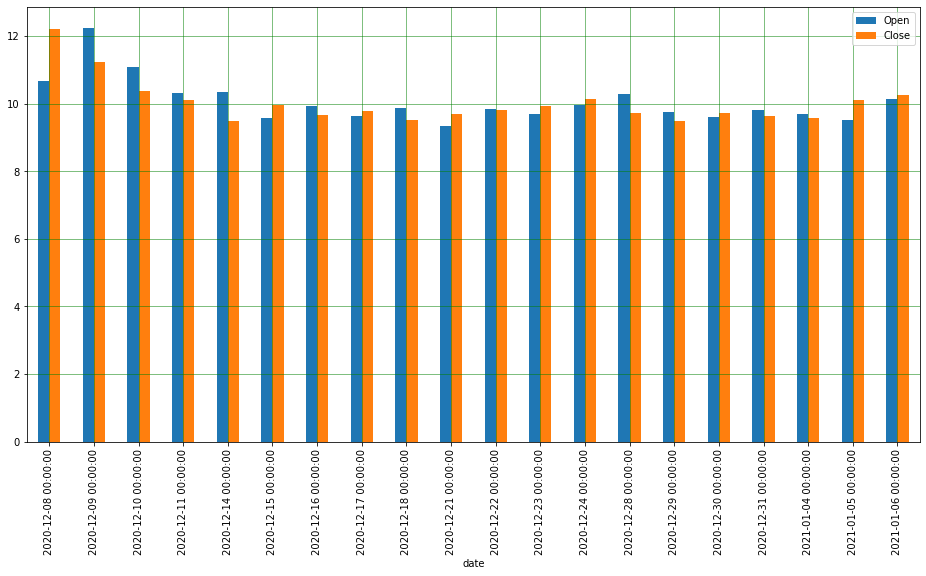

In [49]:
df_interpol = gogo_result
#Plot Open vs Close
df_interpol[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

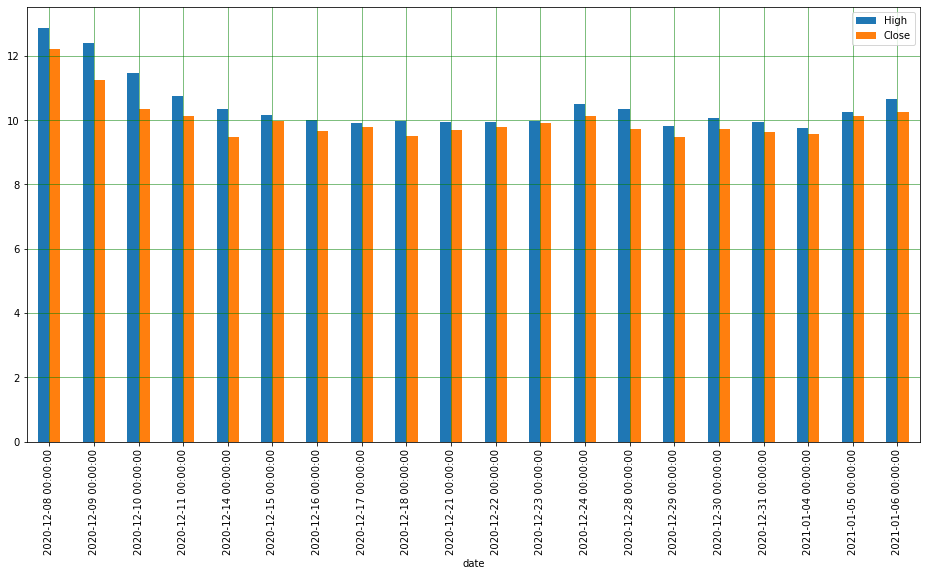

In [50]:
#Plot High vs Close
df_interpol[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

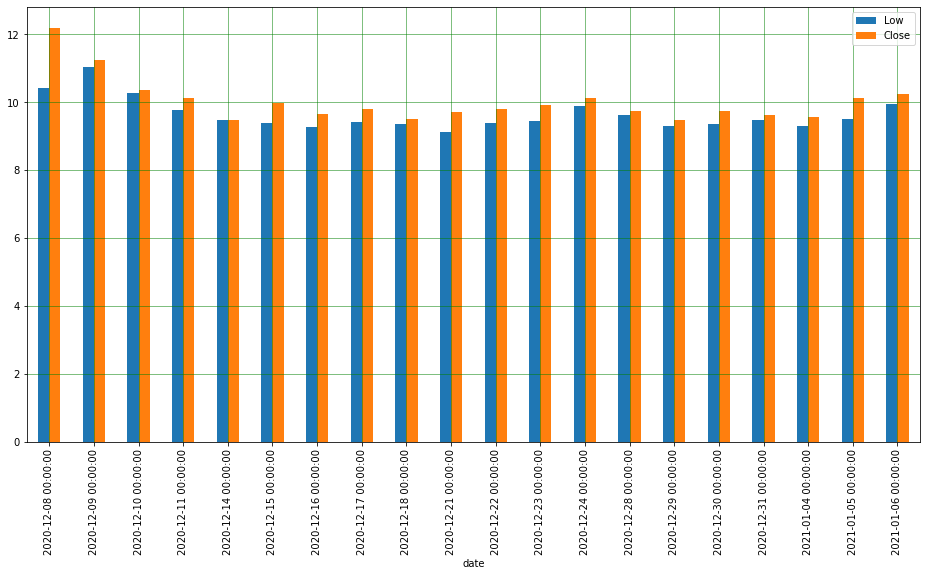

In [51]:
#Plot Low vs Close
df_interpol[["Low", "Close"]].head(20).plot(kind="bar", figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [52]:
#  separate Independent and dependent variable
# X = gogo_result.iloc[:,gogo_result.columns !="Close"]
X = gogo_result["mentions"]
# variable being predicted "Close" col 5
Y = gogo_result["Close"]

In [53]:
print(X.shape) 
print(Y.shape) 

(40,)
(40,)


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [55]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(30,)
(10,)
(30,)
(10,)


In [56]:
x_test

date
2021-01-20    2.0
2020-12-10    1.0
2020-12-15    0.0
2020-12-21    0.0
2020-12-18    0.0
2021-01-19    1.0
2021-01-29    1.0
2021-01-11    1.0
2020-12-14    0.0
2020-12-30    0.0
Name: mentions, dtype: float64

In [57]:
y_test

date
2021-01-20    11.420
2020-12-10    10.360
2020-12-15     9.970
2020-12-21     9.700
2020-12-18     9.510
2021-01-19    11.430
2021-01-29    13.400
2021-01-11    10.875
2020-12-14     9.490
2020-12-30     9.735
Name: Close, dtype: float64

In [58]:
#reshape

lr_model=LinearRegression()
lr_model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [59]:
# y_pred=lr_model.predict(x_test)
y_pred = lr_model.predict(y_test.values.reshape(-1, 1))
print(y_pred.shape)

(10,)


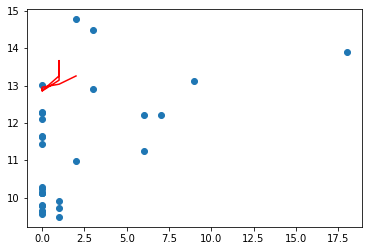

In [60]:
plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [61]:
lr_model.score(x_test.values.reshape(-1, 1),y_test,sample_weight=None)

0.020410266702890922

In [62]:
isun_count = pd.DataFrame(count_df["ISUN"])

In [63]:
isun_price = df["ISUN"]

In [64]:
# enter combined ISUN df info
isun_result = isun_count.join(isun_price)
isun_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,0.0,5.970000,6.180000,5.900000,6.180000,6.180000,97700.0
2020-12-09,0.0,6.090000,6.338000,5.910000,6.090000,6.090000,294800.0
2020-12-10,0.0,5.960000,6.110000,5.900000,5.990000,5.990000,185300.0
2020-12-11,0.0,6.050000,6.090000,5.850000,6.000000,6.000000,136600.0
2020-12-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,0.0,6.070000,6.300000,6.050000,6.120000,6.120000,189600.0
2020-12-15,0.0,6.200000,6.400000,6.090000,6.150000,6.150000,270600.0
2020-12-16,0.0,6.200000,6.239000,5.970000,6.120000,6.120000,159400.0


In [65]:
isun_result.dropna(inplace=True)
isun_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,0.0,5.970000,6.180000,5.900000,6.180000,6.180000,97700.0
2020-12-09,0.0,6.090000,6.338000,5.910000,6.090000,6.090000,294800.0
2020-12-10,0.0,5.960000,6.110000,5.900000,5.990000,5.990000,185300.0
2020-12-11,0.0,6.050000,6.090000,5.850000,6.000000,6.000000,136600.0
2020-12-14,0.0,6.070000,6.300000,6.050000,6.120000,6.120000,189600.0
2020-12-15,0.0,6.200000,6.400000,6.090000,6.150000,6.150000,270600.0
2020-12-16,0.0,6.200000,6.239000,5.970000,6.120000,6.120000,159400.0
2020-12-17,0.0,6.080000,6.260000,6.000000,6.230000,6.230000,297000.0
2020-12-18,0.0,6.060000,6.440000,6.010000,6.250000,6.250000,506000.0


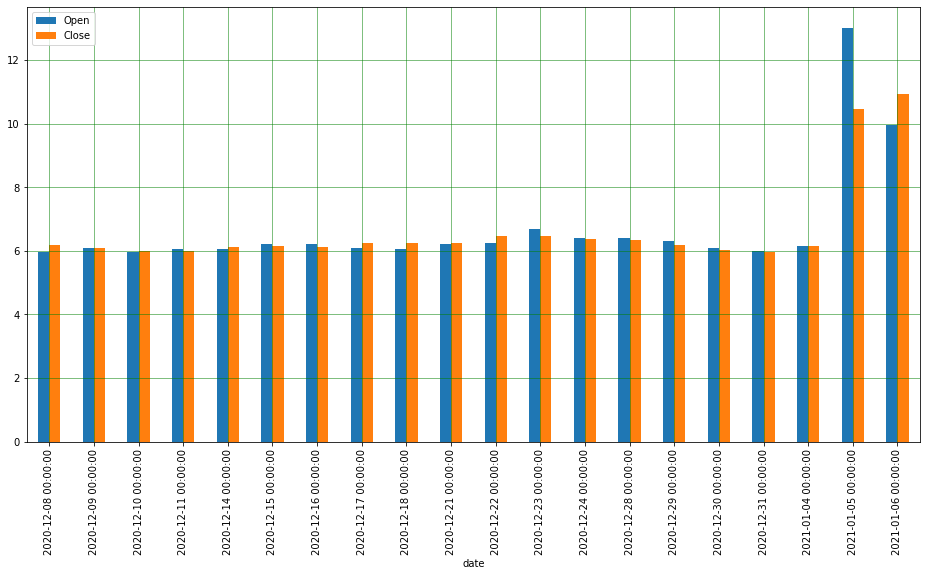

In [66]:
df_interpol = isun_result
#Plot Open vs Close
df_interpol[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

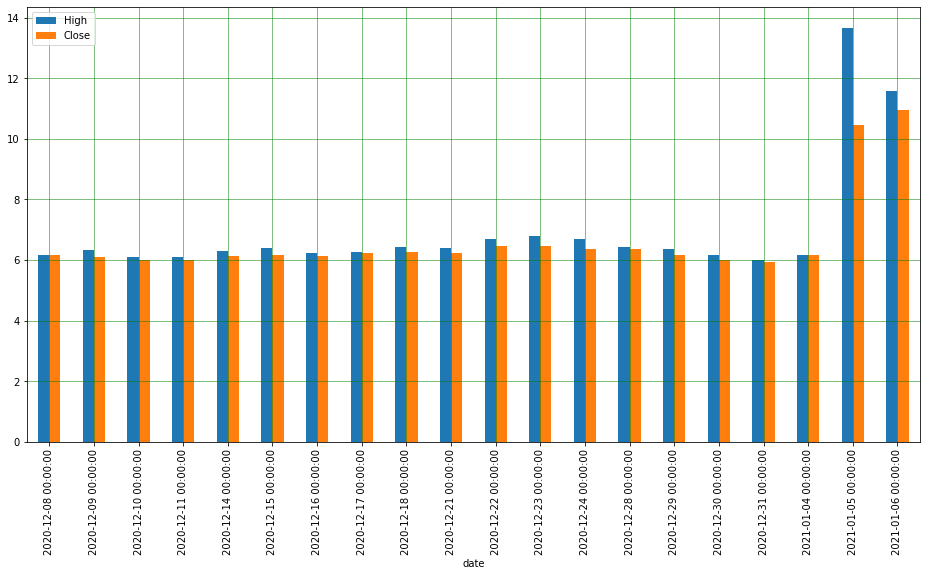

In [67]:
#Plot High vs Close
df_interpol[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

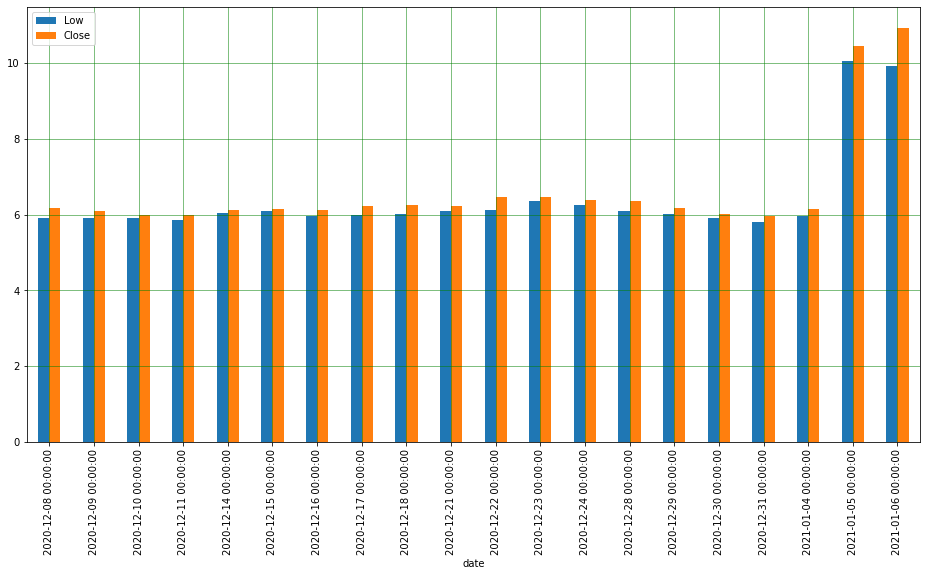

In [68]:
#Plot Low vs Close
df_interpol[["Low", "Close"]].head(20).plot(kind="bar", figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [69]:
#  separate Independent and dependent variable
# X = isun_result.iloc[:,isun_result.columns !="Close"]
X = isun_result["mentions"]
# variable being predicted "Close" col 5
Y = isun_result["Close"]

In [70]:
print(X.shape) 
print(Y.shape) 

(40,)
(40,)


In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [72]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(30,)
(10,)
(30,)
(10,)


In [73]:
#reshape

lr_model=LinearRegression()
lr_model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [74]:
# y_pred=lr_model.predict(x_test)
y_pred = lr_model.predict(y_test.values.reshape(-1, 1))
print(y_pred.shape)

(10,)


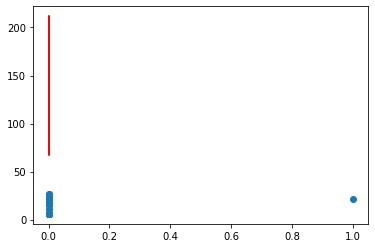

In [75]:
plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [76]:
lr_model.score(x_test.values.reshape(-1, 1),y_test,sample_weight=None)

-0.24078385876355424

In [77]:
clvs_count = pd.DataFrame(count_df["CLVS"])

In [78]:
clvs_price = df["CLVS"]

In [79]:
# enter combined CLVS df info
clvs_result = clvs_count.join(clvs_price)
clvs_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,0.0,5.09,5.17,4.92,5.11,5.11,4008100.0
2020-12-09,0.0,5.16,5.19,4.76,4.89,4.89,4415200.0
2020-12-10,0.0,4.91,4.93,4.76,4.81,4.81,3437100.0
2020-12-11,0.0,4.84,5.16,4.80,4.85,4.85,3923700.0
2020-12-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,0.0,4.90,5.43,4.89,5.33,5.33,6084700.0
2020-12-15,0.0,5.32,5.37,5.04,5.11,5.11,3988100.0
2020-12-16,0.0,5.13,5.16,4.98,5.05,5.05,2041400.0


In [80]:
clvs_result.dropna(inplace=True)
clvs_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,0.0,5.09,5.17,4.92,5.11,5.11,4008100.0
2020-12-09,0.0,5.16,5.19,4.76,4.89,4.89,4415200.0
2020-12-10,0.0,4.91,4.93,4.76,4.81,4.81,3437100.0
2020-12-11,0.0,4.84,5.16,4.80,4.85,4.85,3923700.0
2020-12-14,0.0,4.90,5.43,4.89,5.33,5.33,6084700.0
2020-12-15,0.0,5.32,5.37,5.04,5.11,5.11,3988100.0
2020-12-16,0.0,5.13,5.16,4.98,5.05,5.05,2041400.0
2020-12-17,0.0,5.06,5.15,4.86,5.15,5.15,3212200.0
2020-12-18,0.0,5.18,5.21,4.87,4.90,4.90,10498400.0


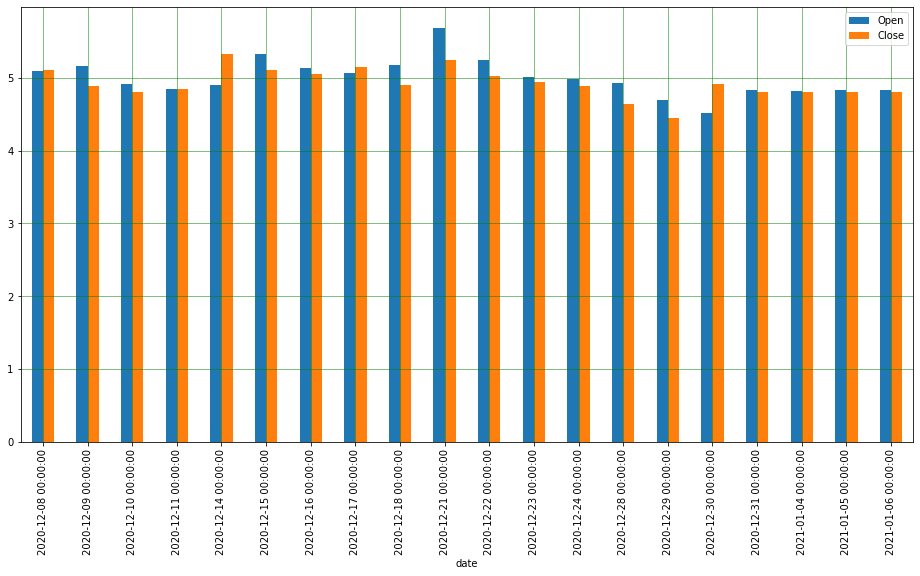

In [81]:
df_interpol = clvs_result
#Plot Open vs Close
df_interpol[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

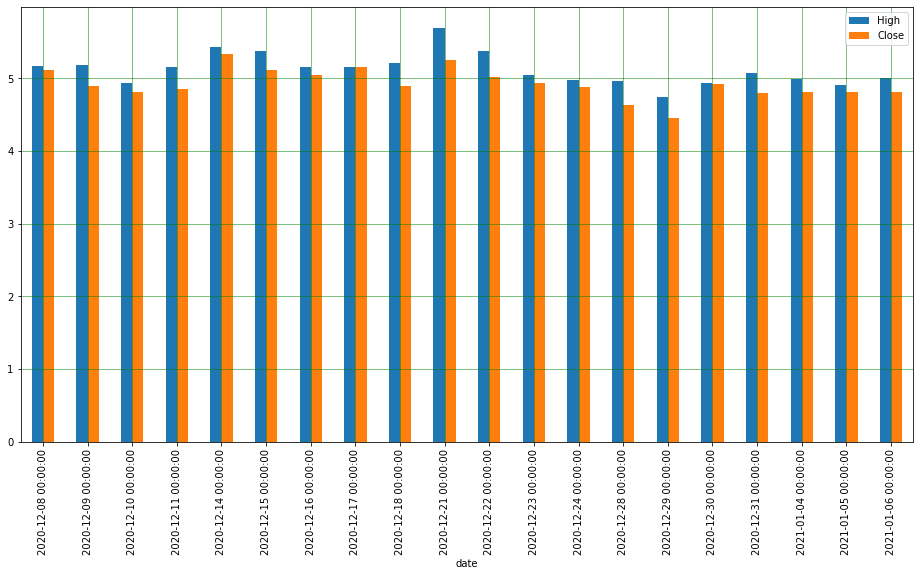

In [82]:
#Plot High vs Close
df_interpol[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

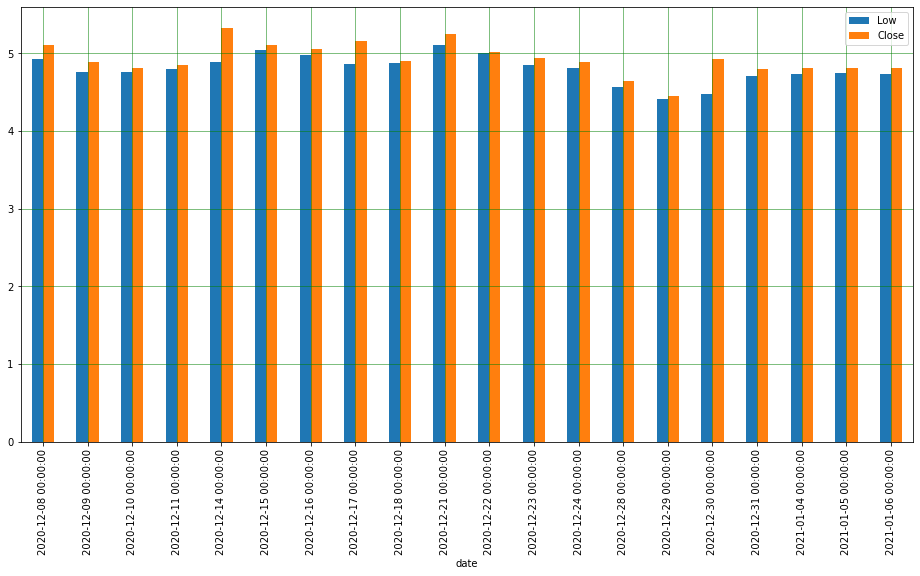

In [83]:
#Plot Low vs Close
df_interpol[["Low", "Close"]].head(20).plot(kind="bar", figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [84]:
#  separate Independent and dependent variable
# X = clvs_result.iloc[:,clvs_result.columns !="Close"]
X = clvs_result["mentions"]
# variable being predicted "Close" col 5
Y = clvs_result["Close"]

In [85]:
print(X.shape) 
print(Y.shape) 

(40,)
(40,)


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [87]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(30,)
(10,)
(30,)
(10,)


In [88]:
#reshape

lr_model=LinearRegression()
lr_model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [89]:
# y_pred=lr_model.predict(x_test)
y_pred = lr_model.predict(y_test.values.reshape(-1, 1))
print(y_pred.shape)

(10,)


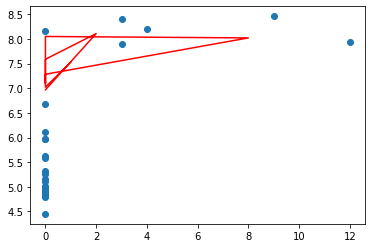

In [90]:
plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [91]:
lr_model.score(x_test .values.reshape(-1, 1),y_test,sample_weight=None)

0.21915077829063023

In [92]:
gme_count = pd.DataFrame(count_df["GME"])

In [93]:
gme_price = df["GME"]

In [94]:
# enter combined GME df info
gme_result = gme_count.join(gme_price)
gme_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,1801.0,16.370001,17.209999,15.930000,16.940001,16.940001,16120200.0
2020-12-09,1867.0,13.920000,14.730000,13.230000,13.660000,13.660000,24357900.0
2020-12-10,571.0,13.120000,14.410000,13.050000,14.120000,14.120000,7558900.0
2020-12-11,406.0,13.910000,14.000000,13.020000,13.310000,13.310000,7496900.0
2020-12-12,258.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,310.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,651.0,13.340000,13.430000,12.140000,12.720000,12.720000,10007100.0
2020-12-15,649.0,12.780000,14.020000,12.480000,13.850000,13.850000,8192900.0
2020-12-16,345.0,13.960000,14.310000,13.580000,13.850000,13.850000,5865100.0


In [95]:
gme_result.dropna(inplace=True)
gme_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,1801.0,16.370001,17.209999,15.930000,16.940001,16.940001,16120200.0
2020-12-09,1867.0,13.920000,14.730000,13.230000,13.660000,13.660000,24357900.0
2020-12-10,571.0,13.120000,14.410000,13.050000,14.120000,14.120000,7558900.0
2020-12-11,406.0,13.910000,14.000000,13.020000,13.310000,13.310000,7496900.0
2020-12-14,651.0,13.340000,13.430000,12.140000,12.720000,12.720000,10007100.0
2020-12-15,649.0,12.780000,14.020000,12.480000,13.850000,13.850000,8192900.0
2020-12-16,345.0,13.960000,14.310000,13.580000,13.850000,13.850000,5865100.0
2020-12-17,433.0,13.960000,14.980000,13.590000,14.830000,14.830000,8194900.0
2020-12-18,579.0,15.780000,16.299999,15.180000,15.630000,15.630000,16618800.0


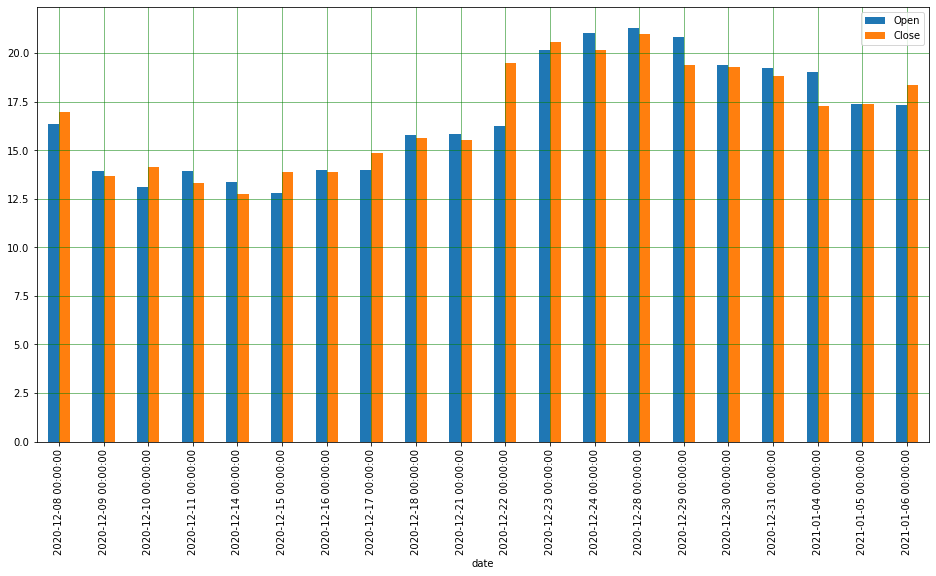

In [96]:
df_interpol = gme_result
#Plot Open vs Close
df_interpol[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

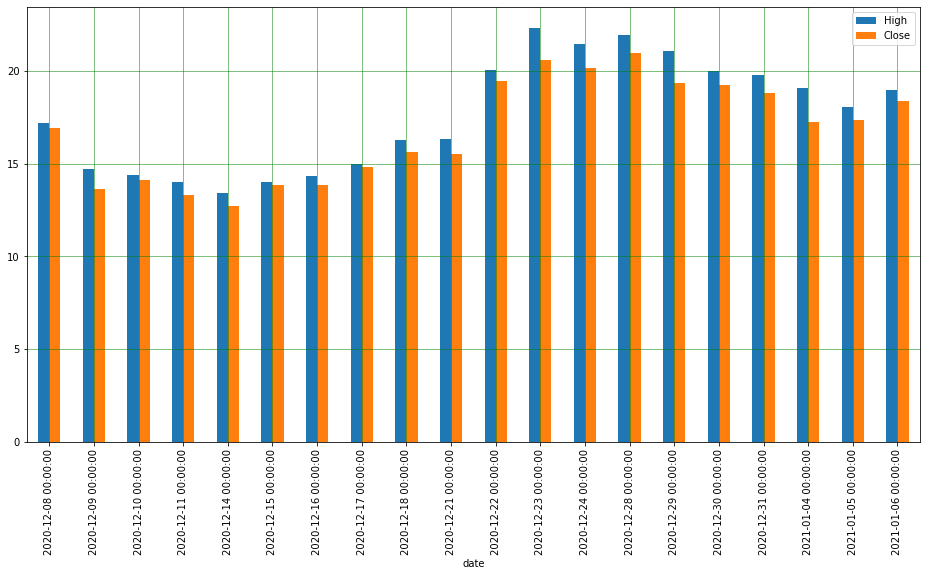

In [97]:
#Plot High vs Close
df_interpol[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

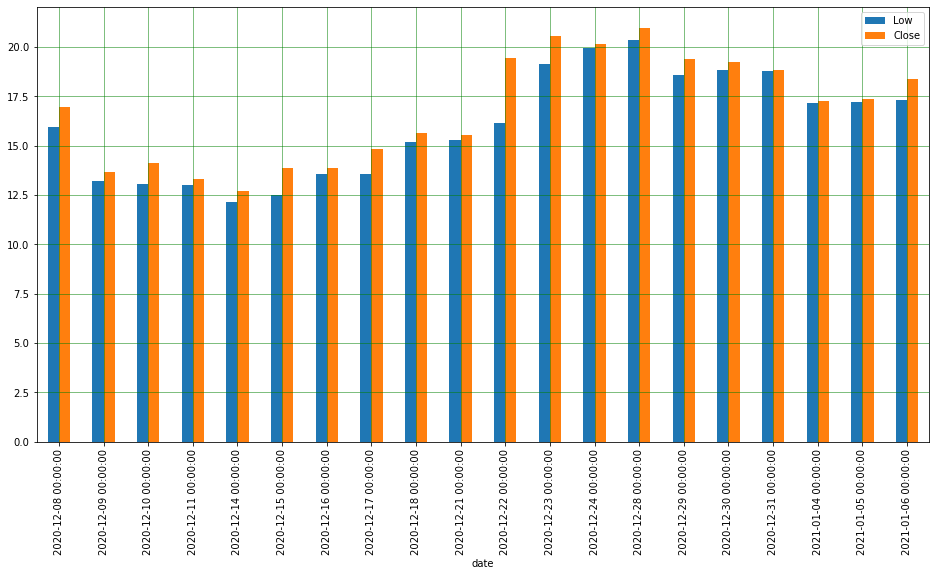

In [98]:
#Plot Low vs Close
df_interpol[["Low", "Close"]].head(20).plot(kind="bar", figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [99]:
#  separate Independent and dependent variable
# X = clvs_result.iloc[:,clvs_result.columns !="Close"]
X = clvs_result["mentions"]
# variable being predicted "Close" col 5
Y = clvs_result["Close"]

In [100]:
print(X.shape) 
print(Y.shape) 

(40,)
(40,)


In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [102]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(30,)
(10,)
(30,)
(10,)


In [103]:
#reshape

lr_model=LinearRegression()
lr_model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [104]:
# y_pred=lr_model.predict(x_test)
y_pred = lr_model.predict(y_test.values.reshape(-1, 1))
print(y_pred.shape)

(10,)


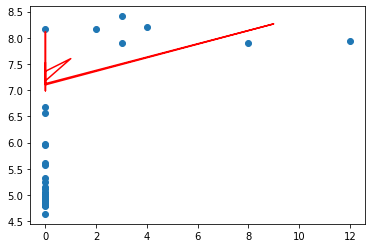

In [105]:
plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [106]:
lr_model.score(x_test.values.reshape(-1, 1),y_test,sample_weight=None)

0.4577425692044471

In [115]:
appended = amc_result.append(clvs_result)

In [116]:
appended

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,11.0,3.61,4.02,3.61,3.98,3.98,29530600.0
2020-12-09,2.0,4.22,4.33,3.75,3.86,3.86,20991200.0
2020-12-10,23.0,3.79,4.10,3.77,4.09,4.09,19872800.0
2020-12-11,15.0,4.04,4.25,3.87,3.92,3.92,22310400.0
2020-12-14,44.0,4.01,4.01,3.00,3.19,3.19,67159000.0
...,...,...,...,...,...,...,...
2021-01-29,8.0,8.58,8.67,7.69,7.90,7.90,8133400.0
2021-02-01,9.0,8.30,8.57,7.88,8.46,8.46,8126300.0
2021-02-02,2.0,8.32,8.34,7.64,8.17,8.17,8097300.0


In [ ]:
appended = gme_result.append(goog)

In [107]:
# #Linear Model Cross-Validation
# from sklearn import model_selection
# from sklearn.model_selection import KFold
# kfold = model_selection.KFold(n_splits=15, random_state=15)
# results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
# print("Accuracy: ", results_kfold.mean()*100)

In [108]:
#Plot actual vs predicted
plot_df=pd.DataFrame({‘Actual:y_test,’Pred’:y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-108-c7adaea471b8>, line 2)